In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir

Create list of patient files in images

In [8]:
base_path='/Users/sandhyagovindarajan/Desktop/Sanju Application/Data Analysis/Breast cancer classification/images/IDC_regular_ps50_idx5/'
patient_files=listdir(base_path)

Calculate number of patients

In [9]:
len(patient_files)

280

There are 280 patients, each having many patches, some for benign and some for malignant

Calculate total number of patches

In [10]:
no_of_patches=0
for patient in patient_files:
    for target in [0,1]:
        patch_path=base_path+patient+'/'+str(target)
        if patch_path not in ['/Users/sandhyagovindarajan/Desktop/Sanju Application/Data Analysis/Breast cancer classification/images/IDC_regular_ps50_idx5/.DS_Store/0','/Users/sandhyagovindarajan/Desktop/Sanju Application/Data Analysis/Breast cancer classification/images/IDC_regular_ps50_idx5/.DS_Store/1','/Users/sandhyagovindarajan/Desktop/Sanju Application/Data Analysis/Breast cancer classification/images/IDC_regular_ps50_idx5/IDC_regular_ps50_idx5/0','/Users/sandhyagovindarajan/Desktop/Sanju Application/Data Analysis/Breast cancer classification/images/IDC_regular_ps50_idx5/IDC_regular_ps50_idx5/1']:
            files=listdir(patch_path)
            no_of_patches+=len(files)
no_of_patches    

277524

There are around 280,000 images that have been classified as benign

Sorting them into dataframe for better analysis potential

In [11]:
df=pd.DataFrame(index=np.arange(0,no_of_patches), columns=['Patient','Path','Target'])
df



,Patient,Path,Target
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
277519,NaN,NaN,NaN
277520,NaN,NaN,NaN
277521,NaN,NaN,NaN
277522,NaN,NaN,NaN


Now that we have created df, let us fill the values

In [12]:
i=0
for patient in patient_files:
    for target in [0,1]:
        patch_path=base_path+patient+'/'+str(target)
        if patch_path not in ['/Users/sandhyagovindarajan/Desktop/Sanju Application/Data Analysis/Breast cancer classification/images/IDC_regular_ps50_idx5/.DS_Store/0','/Users/sandhyagovindarajan/Desktop/Sanju Application/Data Analysis/Breast cancer classification/images/IDC_regular_ps50_idx5/.DS_Store/1','/Users/sandhyagovindarajan/Desktop/Sanju Application/Data Analysis/Breast cancer classification/images/IDC_regular_ps50_idx5/IDC_regular_ps50_idx5/0','/Users/sandhyagovindarajan/Desktop/Sanju Application/Data Analysis/Breast cancer classification/images/IDC_regular_ps50_idx5/IDC_regular_ps50_idx5/1']:
            subfiles=listdir(patch_path)
            for m in range(len(subfiles)):
                df.iloc[i].Patient=patient
                df.iloc[i].Path=patch_path+'/'+subfiles[m]
                df.iloc[i].Target=target
                i+=1
        

In [13]:
df

,Patient,Path,Target
0,9036,/Users/sandhyagovindarajan/Desktop/Sanju Appli...,0
1,9036,/Users/sandhyagovindarajan/Desktop/Sanju Appli...,0
2,9036,/Users/sandhyagovindarajan/Desktop/Sanju Appli...,0
3,9036,/Users/sandhyagovindarajan/Desktop/Sanju Appli...,0
4,9036,/Users/sandhyagovindarajan/Desktop/Sanju Appli...,0
...,...,...,...
277519,8957,/Users/sandhyagovindarajan/Desktop/Sanju Appli...,1
277520,8957,/Users/sandhyagovindarajan/Desktop/Sanju Appli...,1
277521,8957,/Users/sandhyagovindarajan/Desktop/Sanju Appli...,1
277522,8957,/Users/sandhyagovindarajan/Desktop/Sanju Appli...,1


We have filled the details for the images info df

Now we need to visualize data
1) #patches/person
2) % of patches having IDC
3) No: of patches showing IDC

In [14]:
grouped_df=df.groupby('Patient').size()
grouped_df

Patient
10253     549
10254     848
10255     272
10256     468
10257     635
         ... 
9346     1361
9347      410
9381     1326
9382     1652
9383      564
Length: 279, dtype: int64

In [16]:
cancer_percent=df.groupby('Patient').Target.value_counts()/df.groupby('Patient').Target.size()
cancer_percent

Patient  Target
10253    0         0.872495
         1         0.127505
10254    0         0.910377
         1         0.089623
10255    0         0.665441
                     ...   
9381     1         0.096531
9382     0         0.790557
         1         0.209443
9383     0         0.875887
         1         0.124113
Name: Target, Length: 558, dtype: float64

In [10]:
# i=0
# total_cancer=0
# total=0
# cancer_percent_df=pd.DataFrame(columns=['Percent_cancer'])
# while i<=len(grouped_cancer):
#     total_cancer=grouped_cancer.iloc[i]
#     total=grouped_cancer.iloc[i-1]+grouped_cancer.iloc[i]
#     percent_canc=total_cancer/total
#     cancer_percent_df.loc[i]=percent_canc
# cancer_percent_df

In [18]:
patches_showing_IDC=df.groupby('Target').size()
patches_showing_IDC

Target
0    198738
1     78786
dtype: int64

/Users/sandhyagovindarajan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sandhyagovindarajan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'no: of patches with and without IDC'}, xlabel='Target', ylabel='count'>

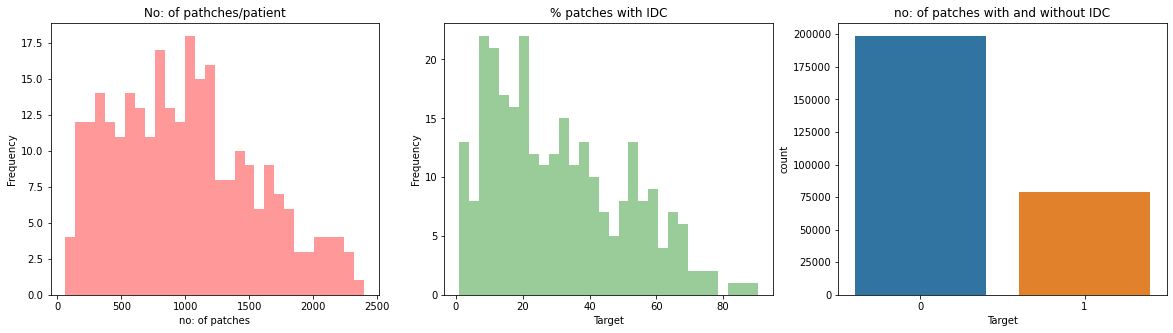

In [12]:
fig,ax=plt.subplots(1,3, figsize=(20,5))
ax[0].set_xlabel('no: of patches')
ax[0].set_ylabel('Frequency')
ax[0].set_title('No: of pathches/patient')
sns.distplot(grouped_df,kde=False,bins=30,color='red',ax=ax[0])
ax[1].set_xlabel('percentage cancer')
ax[1].set_ylabel('Frequency')
ax[1].set_title('% patches with IDC')
sns.distplot(cancer_percent[:,1]*100, kde=False, bins=30, color='green', ax=ax[1])
ax[2].set_xlabel('IDC')
ax[2].set_ylabel('Frequency')
ax[2].set_title('no: of patches with and without IDC')
sns.countplot(df.Target)

In [13]:
df.Target=df.Target.astype(int)
#find indices where target=1 and O. No replacement
pos=np.random.choice(df[df.Target==1].index.values, size=25, replace=False)
neg=np.random.choice(df[df.Target==0].index.values, 25, replace=False)

chart out the images of positive and negative tissues

Positive images with cancer

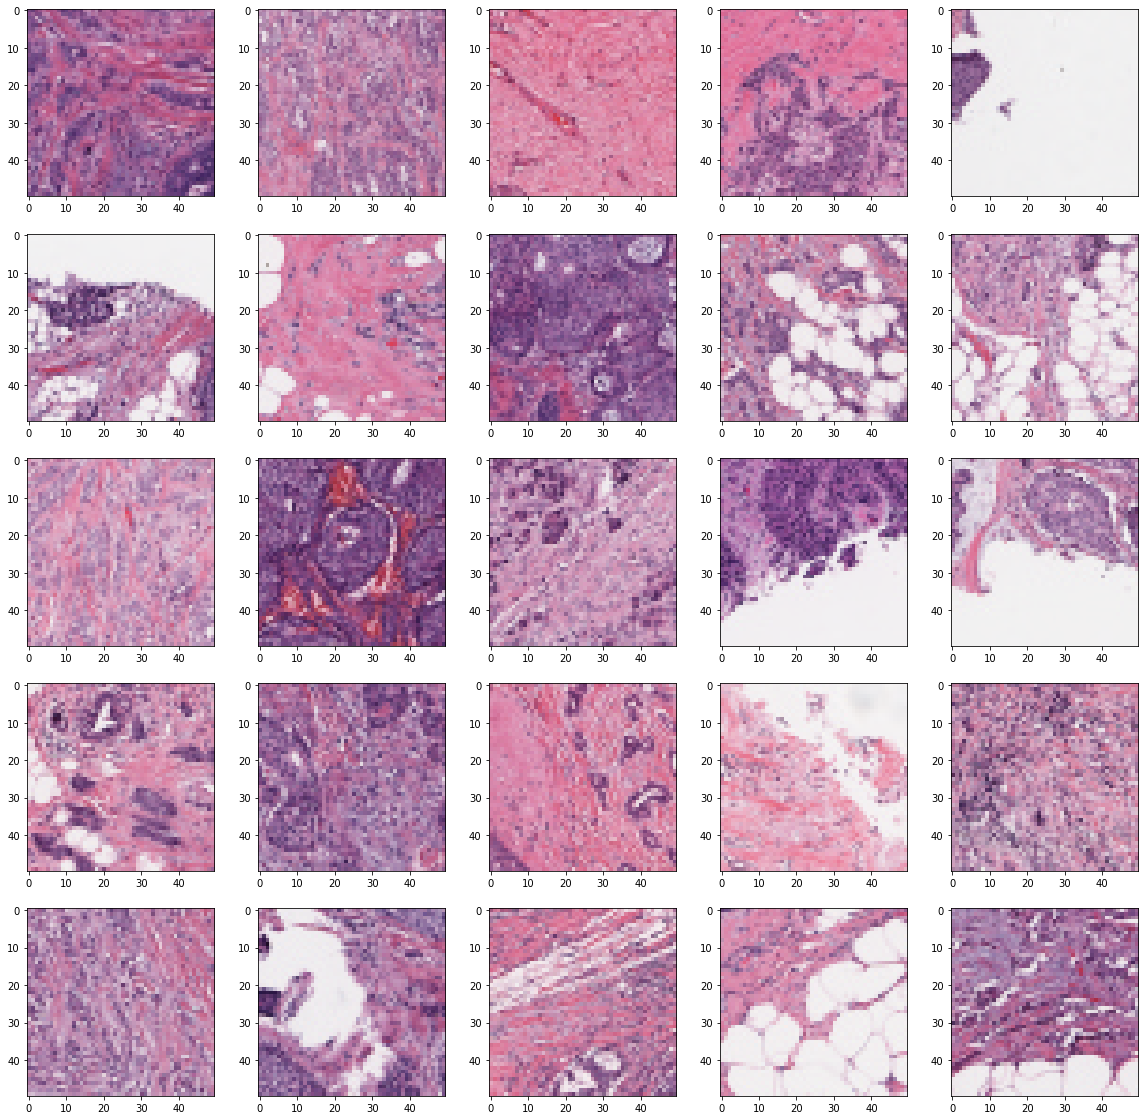

In [14]:
#showing images of cancer(all 25 mentioned above)
fig,ax=plt.subplots(5,5,figsize=(20,20))
# need 2 coordinates to determine location in graph
count=0
for i in range(5):
    for j in range(5):
        #read image file 
        index=pos[count]
        path=df.Path.loc[index]
        im=plt.imread(path)
        ax[i,j].imshow(im)
        count+=1

Negative images with cancer

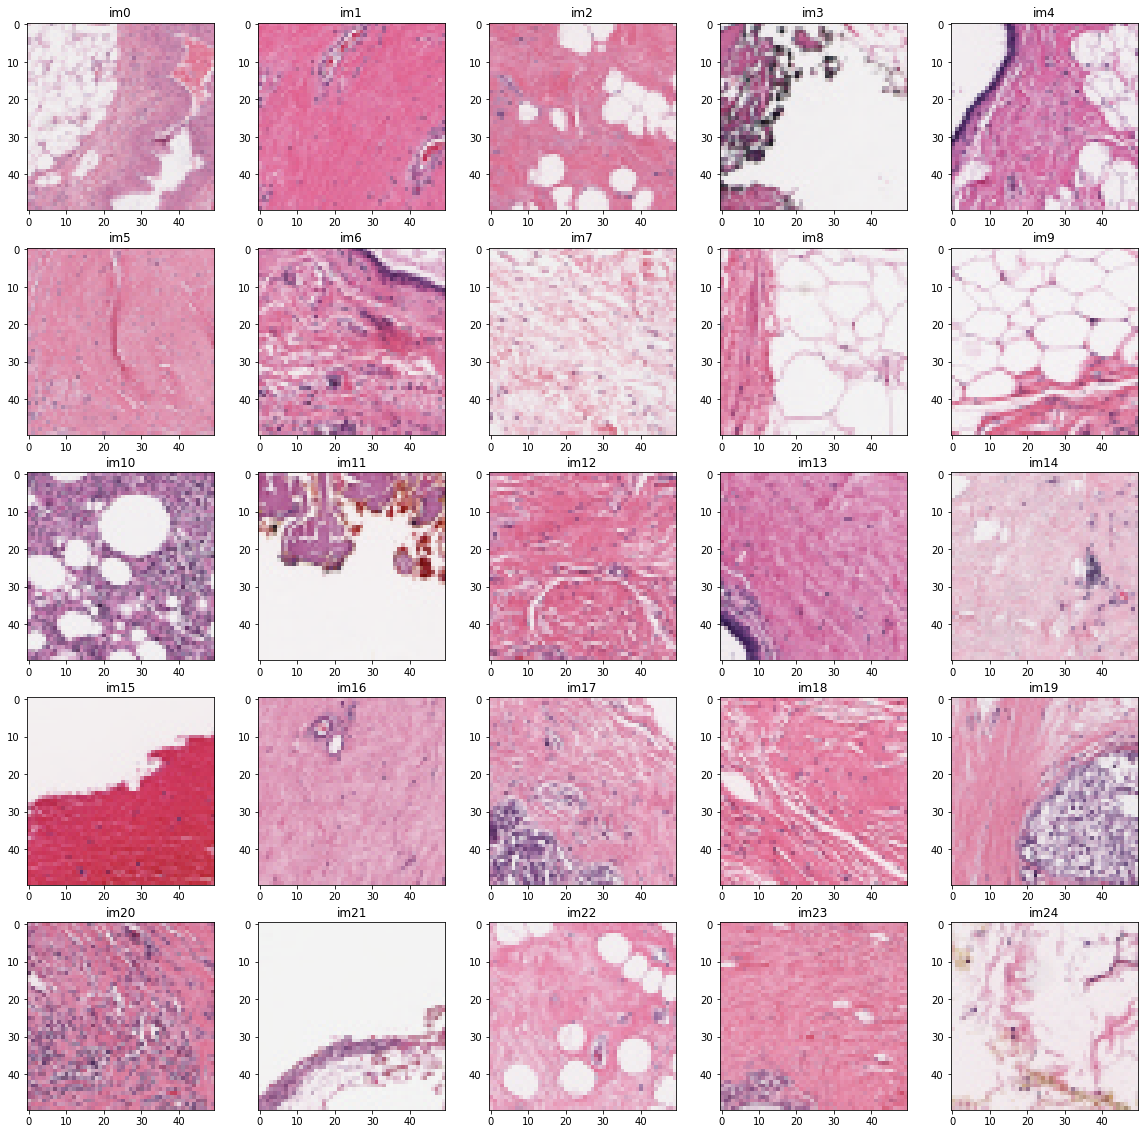

In [15]:
fig,ax=plt.subplots(5,5,figsize=(20,20))
count=0
for i in range(5):
    for j in range(5):
        #find index
        index=neg[count]
        #find path
        im_path=df.Path.loc[index]
        im=plt.imread(im_path)
        ax[i,j].imshow(im)
        ax[i,j].grid(False)
        ax[i,j].set_title(f'im{count}')
        count+=1

For healthy patches- lesser coverage slides present 

In [16]:
#Extract the coordinates information from each image file name under target under patient

In [17]:

base_path

'/Users/sandhyagovindarajan/Desktop/Sanju Application/Data Analysis/Breast cancer classification/images/IDC_regular_ps50_idx5/'

In [18]:
def get_patient_data(patient_id,n):
    count=0
    df_crd=pd.DataFrame(index=np.arange(0,n), columns=['x','y','Target','Path'])
    for target in [0,1]:
        patch_path=base_path+patient_id+'/'+str(target)
        #create list of all the names of patches
        subfiles=listdir(patch_path)
        for filename in subfiles:
            #split filename across _ to get x and y coord
            coord_list=filename.split('_')
            x_coord=int(coord_list[2][1:])
            y_coord=int(coord_list[3][1:])
            df_crd.iloc[count].x=x_coord
            df_crd.iloc[count].y=y_coord
            df_crd.iloc[count].Target=target
            df_crd.iloc[count].Path=patch_path+'/'+filename
            count+=1

    return df_crd
grouped_df=df.groupby('Patient', as_index=False).size()
grouped_df.Patient=grouped_df.Patient.astype('int32')
patient_id=df.Patient.unique()[0]
n=grouped_df[grouped_df.Patient==int(patient_id)]['size'].iloc[0]
dfg=get_patient_data(patient_id,n)      
dfg.tail()


,x,y,Target,Path
1301,1751,1401,1,/Users/sandhyagovindarajan/Desktop/Sanju Appli...
1302,1701,1251,1,/Users/sandhyagovindarajan/Desktop/Sanju Appli...
1303,1701,1551,1,/Users/sandhyagovindarajan/Desktop/Sanju Appli...
1304,1701,1301,1,/Users/sandhyagovindarajan/Desktop/Sanju Appli...
1305,1751,1551,1,/Users/sandhyagovindarajan/Desktop/Sanju Appli...


visualizing coordinates with cancer and non cancer

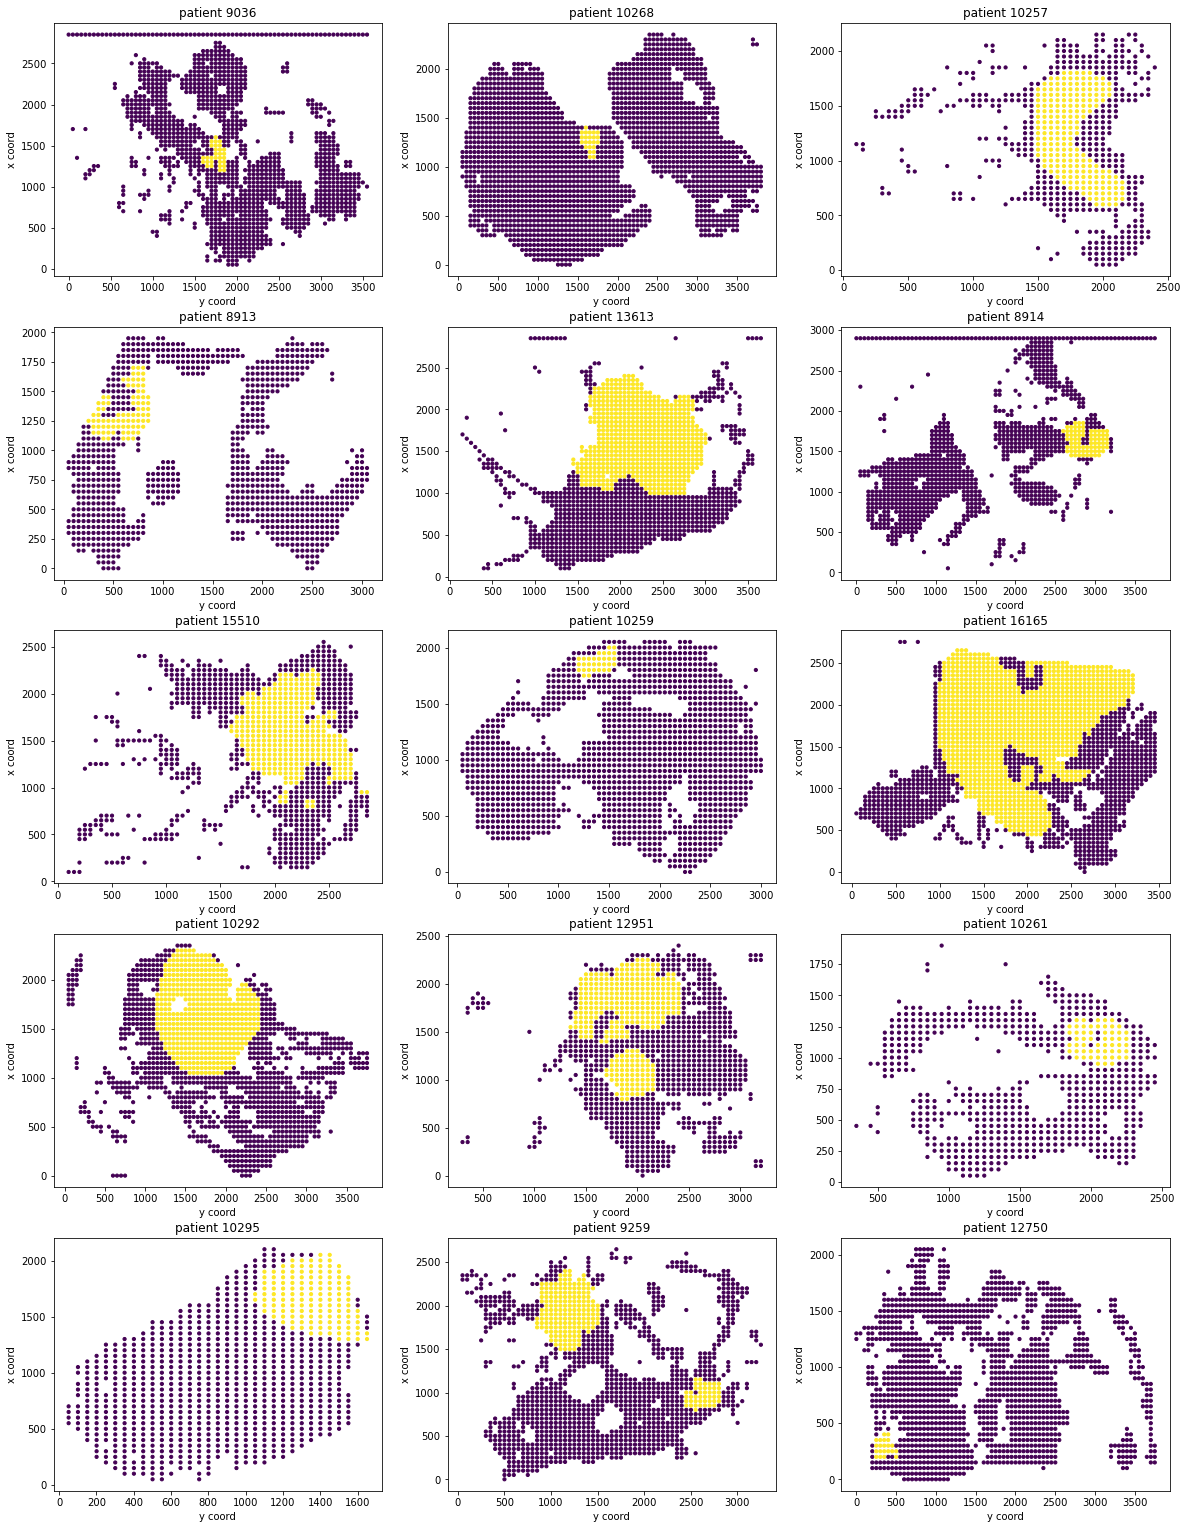

In [19]:
count=0
#set axis and fig size
fig,ax=plt.subplots(5,3,figsize=(20,27))
#total 15 patient samples' 0 and 1 to be viewed
for i in range(5):
    for j in range(3):   
        patient_id = df.Patient.unique()[count]
        n=grouped_df[grouped_df.Patient==int(patient_id)]['size'].iloc[0]
        dfg = get_patient_data(patient_id,n)   
        ax[i,j].scatter(dfg.x.values, dfg.y.values, c=dfg.Target.values, cmap="viridis",s=10);
        ax[i,j].set_title("patient " + patient_id)
        ax[i,j].set_xlabel("y coord")
        ax[i,j].set_ylabel("x coord")
        count+=1

Reconstruct the entire tissue using images

In [20]:
fig,ax=plt.subplots(5,3,figsize=(20,27))
im=plt.imread()
ax[i,j].

SyntaxError: invalid syntax (<ipython-input-20-cb4fc3928ad4>, line 3)

training data